In [4]:
user = "Alex"
pathtorepo = "C:\\Users\\" * user * "\\Desktop\\"

using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include("C:\\Users\\" * user * "\\Desktop\\dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

HR_mem (generic function with 1 method)

In [5]:
using StaticArrays, DifferentialEquations, DynamicalSystems, Statistics
x1 = y1 = z1 = x2 = y2 = z2  = interval(-10, 10)
box = x1 × y1 × z1 × x2 × y2 × z2
using CairoMakie
using LinearAlgebra

In [6]:
function HR_mem(u, p, t)
    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end
    a, b, c, d, s, xr, r,  I, vs, g1, g2, k  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - g1 * ( x1 - vs ) * sigma(x2) + k*(x2 - x1)
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )                                                                                                                                          
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - g2 * ( x2 - vs ) * sigma(x1) + k*(x1 - x2)
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )

    return SVector(du1, du2, du3, du4, du5, du6)
end

HR_mem (generic function with 1 method)

In [7]:
@inbounds function jacob_HR_mem(u, p, t)

    a, b, c, d, s, xr, r,  I, vs, g1, g2, k  = p
    x1, y1, z1, x2, y2, z2 = u

    function sigma(x)
        return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
    end

    sigmax1der = 10.0 * exp( -10.0*( x1 + 0.25 ) ) / ( 1.0 + exp( -10.0*( x1 + 0.25 ) ) )^2
    sigmax2der = 10.0 * exp( -10.0*( x2 + 0.25 ) ) / ( 1.0 + exp( -10.0*( x2 + 0.25 ) ) )^2
    
    x1x1 = 2.0*b*x1 - 3.0 * a * x1^2 - g1 * sigma(x2) - k
    x1y1 = 1.0
    x1z1 = -1.0
    x1x2 = -g1 * ( x1 - vs ) * sigmax2der + k
    x1y2 = 0.0
    x1z2 = 0.0

    y1x1 = -2.0 * d * x1
    y1y1 = -1.0
    y1z1 = 0.0
    y1x2 = 0.0
    y1y2 = 0.0
    y1z2 = 0.0

    z1x1 = r * s
    z1y1 = 0.0
    z1z1 = -r
    z1x2 = 0.0
    z1y2 = 0.0
    z1z2 = 0.0
    # -------------------------------------

    x2x2 = 2.0*b*x2 - 3.0 * a * x2^2 - g2 * sigma(x1) - k
    x2y2 = 1.0
    x2z2 = -1.0
    x2x1 = -g2 * ( x2 - vs ) * sigmax1der + k
    x2y1 = 0.0
    x2z1 = 0.0

    y2x2 = -2.0 * d * x2
    y2y2 = -1.0
    y2z2 = 0.0
    y2x1 = 0.0
    y2y1 = 0.0
    y2z1 = 0.0

    z2x2 = r * s
    z2y2 = 0.0
    z2z2 = -r
    z2x1 = 0.0
    z2y1 = 0.0
    z2z1 = 0.0


    SMatrix{6,6}(x1x1, y1x1, z1x1, x2x1, y2x1, z2x1,
    x1y1, y1y1, z1y1, x2y1, y2y1, z2y1,
    x1z1, y1z1, z1z1, x2z1, y2z1, z2z1,
    x1x2, y1x2, z1x2, x2x2, y2x2, z2x2,
    x1y2, y1y2, z1y2, x2y2, y2y2, z2y2,
    x1z2, y1z2, z1z2, x2z2, y2z2, z2z2)
end

jacob_HR_mem (generic function with 1 method)

In [8]:
a = 1.0; b = 3.0; c = 1.0; d = 5.0;
xr = -1.6; r = 0.01; s = 5.0; I = 4.0; xv = 2.0;
g1 = -0.17; g2 = -0.17
# Bautin bifurcation point at (:k, :k1) ≈ (0.6189496277966194, -0.27108986294801735).
k = 1.0
u0 = SA[-1.5, 0, 0, 2.5, -6.354990997836504, 3.5694446819312655] # SA[-1.5, -6.354990997836504, 3.5694446819312655, 2.5, -6.354990997836504, 3.5694446819312655]
p = [a, b, c, d, s, xr, r, I, xv, g1, g2, k];

In [9]:
Jacobi = jacob_HR_mem(u0, p, 0.0)

6×6 SMatrix{6, 6, Float64, 36} with indices SOneTo(6)×SOneTo(6):
 -16.58   1.0  -1.0     1.0    0.0   0.0
  15.0   -1.0   0.0     0.0    0.0   0.0
   0.05   0.0  -0.01    0.0    0.0   0.0
   1.0    0.0   0.0    -4.75   1.0  -1.0
   0.0    0.0   0.0   -25.0   -1.0   0.0
   0.0    0.0   0.0     0.05   0.0  -0.01

In [10]:
det(Jacobi)

0.02276549926637632

In [11]:
tstart = 0.0
tend = 50000.0
tspan = (tstart, tend)
tstep = 0.001

0.001

In [12]:
prob = ODEProblem(HR_mem, u0, tspan, p)

ODEProblem with uType SVector{6, Float64} and tType Float64. In-place: false
timespan: (0.0, 50000.0)
u0: 6-element SVector{6, Float64} with indices SOneTo(6):
 -1.5
  0.0
  0.0
  2.5
 -6.354990997836504
  3.5694446819312655

In [13]:
sol = solve(prob, RK4(), adaptive = false, dt = 0.01);

In [14]:
println("$(length(sol))")

5000001


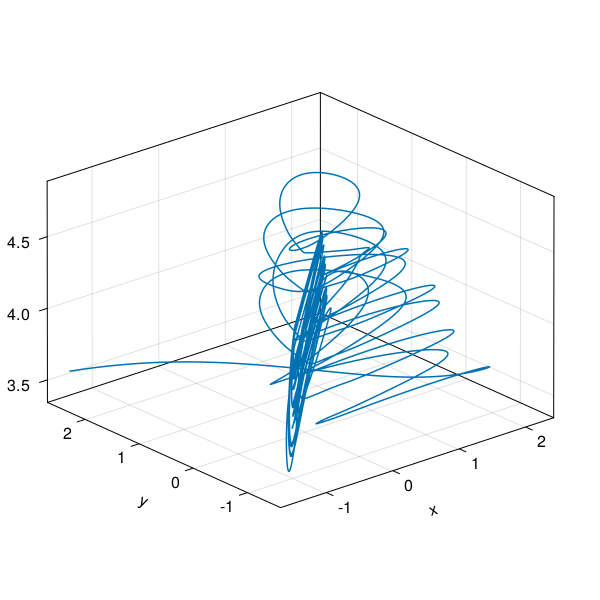

CairoMakie.Screen{IMAGE}


In [16]:
indexx, indexy, indexz = 1, 4, 6
tstart, tend = 1, 4900000
f = Figure(resolution = (600, 600))
axis3d = Axis3(f[1, 1])
lines!(axis3d, sol[indexx, tstart:tend], sol[indexy, tstart:tend], sol[indexz, tstart:tend])
display(f)

In [17]:
integ_set = (alg = RK4(), adaptive = false, dt = 0.001)
ds = CoupledODEs(HR_mem, u0, p, diffeq = integ_set)

6-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  HR_mem
 ODE solver:    RK4
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -1.17, -0.17, 1.0]
 time:          0.0
 state:         [-1.5, -6.354990997836504, 3.5694446819312655, 2.5, -6.354990997836504, 3.5694446819312655]


In [18]:
fp, ei, stable = fixedpoints(ds, box, jacob_HR_mem)

(6-dimensional StateSpaceSet{Float64} with 1 points, Vector{ComplexF64}[[-8.881414432021247 + 0.0im, -7.383267332759711 + 0.0im, -0.03772886480285602 - 0.06936118596708245im, -0.03772886480285602 + 0.06936118596708245im, 0.06866334698241028 + 0.0im, 0.07534174326383887 + 0.0im]], Bool[0])

In [19]:
ei[1]

6-element Vector{ComplexF64}:
   -8.881414432021247 + 0.0im
   -7.383267332759711 + 0.0im
 -0.03772886480285602 - 0.06936118596708245im
 -0.03772886480285602 + 0.06936118596708245im
  0.06866334698241028 + 0.0im
  0.07534174326383887 + 0.0im

In [20]:
Λs = lyapunovspectrum(ds, 50000, Ttr = 20000)

6-element Vector{Float64}:
   4.5227160809632035e-5
  -0.024874791862360867
  -0.10370276316915483
  -0.21589475025209862
  -7.68115038832188
 -11.238205265787167

In [21]:
tands = TangentDynamicalSystem(ds; J = jacob_HR_mem)
λλ = lyapunovspectrum(tands, 50000, Ttr = 20000)

6-element Vector{Float64}:
   4.522716080963166e-5
  -0.02487479186236085
  -0.10370276316915479
  -0.21589475025209853
  -7.681150388332974
 -11.238205265706592